In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
warnings.filterwarnings('ignore')

from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Importing the ***required libraries*** for creating and visualizing the model.

In [4]:
df = pd.read_csv(r'openpowerlifting.csv')
df.head()


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [4]:
df.shape[0]

1423354

Setting dataframe from the powerlifting data we are using. The data is directly from CSV and will be processed later on in the development of the model. We then describe the dataset to get a better look at what it looks like.

In [5]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Wilks,McCulloch,Glossbrenner,IPFPoints
count,757527.000000,1.406622e+06,337580.000000,333349.000000,323842.000000,3696.000000,1.031450e+06,499779.000000,493486.000000,478485.000000,...,363544.000000,356023.000000,339947.000000,9246.000000,1.081808e+06,1.313184e+06,1.304407e+06,1.304254e+06,1.304407e+06,1.273286e+06
mean,31.501570,8.422503e+01,114.102442,92.155846,30.056842,71.356870,1.740049e+02,83.892373,55.065745,-18.520481,...,162.700840,130.228378,12.995484,78.914945,1.872585e+02,3.956148e+02,2.882247e+02,2.960682e+02,2.718484e+02,4.854330e+02
std,13.371707,2.322011e+01,147.143021,173.701524,200.413385,194.522045,6.923931e+01,105.196350,130.302229,144.225726,...,108.681438,162.680134,215.052488,192.605159,6.232821e+01,2.011420e+02,1.231805e+02,1.249700e+02,1.175571e+02,1.133489e+02
min,0.000000,1.510000e+01,-555.000000,-580.000000,-600.500000,-550.000000,-4.775000e+02,-480.000000,-507.500000,-575.000000,...,-461.000000,-470.000000,-587.500000,-461.000000,-4.100000e+02,2.500000e+00,1.470000e+00,1.470000e+00,1.410000e+00,2.160000e+00
25%,21.000000,6.670000e+01,90.000000,68.000000,-167.500000,-107.840000,1.224700e+02,57.500000,-52.500000,-140.000000,...,125.000000,115.000000,-210.000000,-110.000000,1.383500e+02,2.325000e+02,1.979000e+02,2.048200e+02,1.828100e+02,4.028600e+02
50%,28.000000,8.180000e+01,147.500000,145.000000,110.000000,135.000000,1.678300e+02,105.000000,95.000000,-60.000000,...,180.000000,177.500000,117.500000,145.150000,1.850000e+02,3.787500e+02,3.052000e+02,3.120300e+02,2.859400e+02,4.780500e+02
75%,40.000000,9.915000e+01,200.000000,205.000000,192.500000,205.000000,2.175000e+02,145.000000,145.000000,117.500000,...,226.800000,230.000000,205.000000,210.000000,2.300000e+02,5.400000e+02,3.745600e+02,3.837600e+02,3.552800e+02,5.597000e+02
max,97.000000,2.580000e+02,555.000000,566.990000,560.000000,505.500000,5.750000e+02,467.500000,487.500000,478.540000,...,450.000000,460.400000,457.500000,418.000000,5.850000e+02,1.367500e+03,7.793800e+02,8.044000e+02,7.429600e+02,1.245930e+03


We want to normalize based on who was Tested for performance enhancing drugs. We also want only those who participated in all 3 events, Squat, bench and Deadlift.

In [5]:
df = df[df.Tested == "Yes"]
df = df[df.Event == "SBD"]
df.shape[0]

871807

Now we can select the variables we want to be included in the dataset. I have chosen things that can be calculated/measured before competition to make sure the project is accurate.
I chose: Age, Sex, Equipment usage, Bodyweight, Bodyweight division, Age division, Wilks coefficient, Mcculloch Coeficient, and the Country that the meet took place in.

In [6]:
df = df[["Age", "AgeClass", "Sex", "BodyweightKg", "MeetCountry", "Equipment", "Wilks", "Glossbrenner","McCulloch", "Place"]] # ADD WEIGhtCLASS AND CATEGORIZE IT
df.head()

,Age,AgeClass,Sex,BodyweightKg,MeetCountry,Equipment,Wilks,Glossbrenner,McCulloch,Place
8164,16.0,16-17,M,93.8,Germany,Raw,248.70,239.44,281.03,1
8165,20.5,20-23,M,69.5,Germany,Raw,275.04,266.55,280.54,1
8166,18.0,18-19,M,69.4,Germany,Raw,324.38,314.38,343.84,1
8167,17.5,18-19,M,67.8,Germany,Raw,247.77,240.30,262.64,2
8168,NaN,NaN,M,91.4,Germany,Raw,316.74,305.13,316.74,1


Enumerate sex for data.

In [7]:
df.Sex = df.Sex.map({'M': 0, 'F': 1})
df.head()

,Age,AgeClass,Sex,BodyweightKg,MeetCountry,Equipment,Wilks,Glossbrenner,McCulloch,Place
8164,16.0,16-17,0,93.8,Germany,Raw,248.70,239.44,281.03,1
8165,20.5,20-23,0,69.5,Germany,Raw,275.04,266.55,280.54,1
8166,18.0,18-19,0,69.4,Germany,Raw,324.38,314.38,343.84,1
8167,17.5,18-19,0,67.8,Germany,Raw,247.77,240.30,262.64,2
8168,NaN,NaN,0,91.4,Germany,Raw,316.74,305.13,316.74,1


Enumerate the countries of the meets.

In [8]:
countries = df.MeetCountry.unique()

add,i = {}, 0
for country in  countries:
    add[country] = i
    i+=1

df.MeetCountry = df.MeetCountry.map(add)
df.head()

,Age,AgeClass,Sex,BodyweightKg,MeetCountry,Equipment,Wilks,Glossbrenner,McCulloch,Place
8164,16.0,16-17,0,93.8,0,Raw,248.70,239.44,281.03,1
8165,20.5,20-23,0,69.5,0,Raw,275.04,266.55,280.54,1
8166,18.0,18-19,0,69.4,0,Raw,324.38,314.38,343.84,1
8167,17.5,18-19,0,67.8,0,Raw,247.77,240.30,262.64,2
8168,NaN,NaN,0,91.4,0,Raw,316.74,305.13,316.74,1


Enumerate Equipment.

In [9]:
equip = df.Equipment.unique()

values,i  = {},0
for equi in equip:
    values[equi] = i
    i+=1

df.Equipment = df.Equipment.map(values)
df.head()

,Age,AgeClass,Sex,BodyweightKg,MeetCountry,Equipment,Wilks,Glossbrenner,McCulloch,Place
8164,16.0,16-17,0,93.8,0,0,248.70,239.44,281.03,1
8165,20.5,20-23,0,69.5,0,0,275.04,266.55,280.54,1
8166,18.0,18-19,0,69.4,0,0,324.38,314.38,343.84,1
8167,17.5,18-19,0,67.8,0,0,247.77,240.30,262.64,2
8168,NaN,NaN,0,91.4,0,0,316.74,305.13,316.74,1


In [10]:
df = df.fillna(round(df.Age.mean(),2))

age_range = {
    '16-17':16, 
    '20-23':20, 
    '18-19':18, 
    '24-34':24, 
    '35-39':35, 
    '40-44':40, 
    '70-74':70,
    '55-59':55, 
    '45-49':45, 
    '50-54':50, 
    '60-64':60, 
    '13-15':13, 
    '65-69':65, 
    '75-79':75,
    '80-999':80, 
    '5-12':5,
    28.72: 24
}

df.AgeClass = df.AgeClass.map(age_range)
# df.AgeClass = df.AgeClass.map(age_range)
df.head()

,Age,AgeClass,Sex,BodyweightKg,MeetCountry,Equipment,Wilks,Glossbrenner,McCulloch,Place
8164,16.00,16,0,93.8,0,0,248.70,239.44,281.03,1
8165,20.50,20,0,69.5,0,0,275.04,266.55,280.54,1
8166,18.00,18,0,69.4,0,0,324.38,314.38,343.84,1
8167,17.50,18,0,67.8,0,0,247.77,240.30,262.64,2
8168,28.72,24,0,91.4,0,0,316.74,305.13,316.74,1


In [11]:
df.Wilks.replace(28.72, round(df.Wilks.mean(),2))
df.Glossbrenner.replace(28.72, round(df.Glossbrenner.mean(),2))
df.McCulloch.replace(28.72,round(df.Glossbrenner.mean(),2))

8164       281.03
8165       280.54
8166       343.84
8167       262.64
8168       316.74
            ...  
1423349    438.27
1423350    372.60
1423351    382.36
1423352    290.88
1423353    290.88
Name: McCulloch, Length: 871807, dtype: float64

HANDLE PLACE NOW

In [12]:
df.Place.replace('DQ', '120',inplace=True)
df.Place.replace('G', '120',inplace=True)
df.Place.replace('DD', '120',inplace=True)
df.Place.replace('NS', '120',inplace=True)

df.Place = pd.to_numeric(df.Place)

bins = [0,4,15,50,150]
labels = [0,1,2,3]# 0 = Excellent, 1 = good, 2 = Alright, 3 = poorly

df['Place']= pd.cut(x=df['Place'], bins=bins, labels=labels)
df.Place

8164       0
8165       0
8166       0
8167       0
8168       0
          ..
1423349    0
1423350    1
1423351    1
1423352    3
1423353    3
Name: Place, Length: 871807, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

For Speed comment this out

In [14]:
sns.pairplot(df,hue="Place")

Text(0, 0.5, 'Correlation')

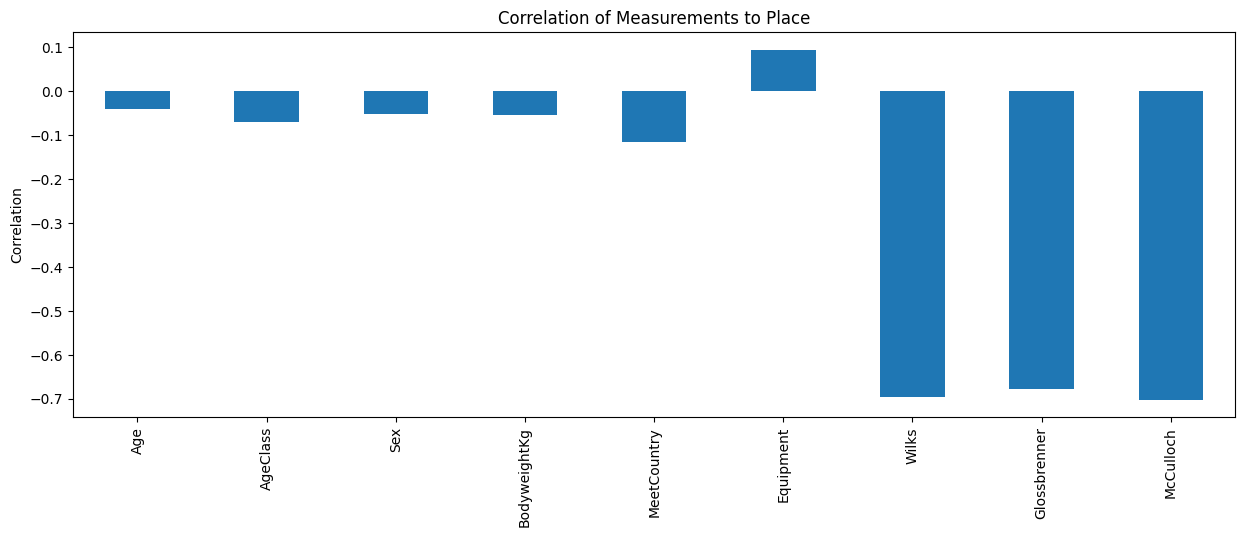

In [15]:
plt.figure(figsize=(15,5))
plot = df.corrwith(df.Place).plot(kind='bar',title='Correlation of Measurements to Place')
plot.set_ylabel('Correlation')

In [13]:
df.Age = pd.to_numeric(df.Age)
df.Wilks = pd.to_numeric(df.Wilks)
df.Glossbrenner = pd.to_numeric(df.Glossbrenner)
df.McCulloch = pd.to_numeric(df.McCulloch)

<AxesSubplot: title={'center': 'Correlation plot'}>

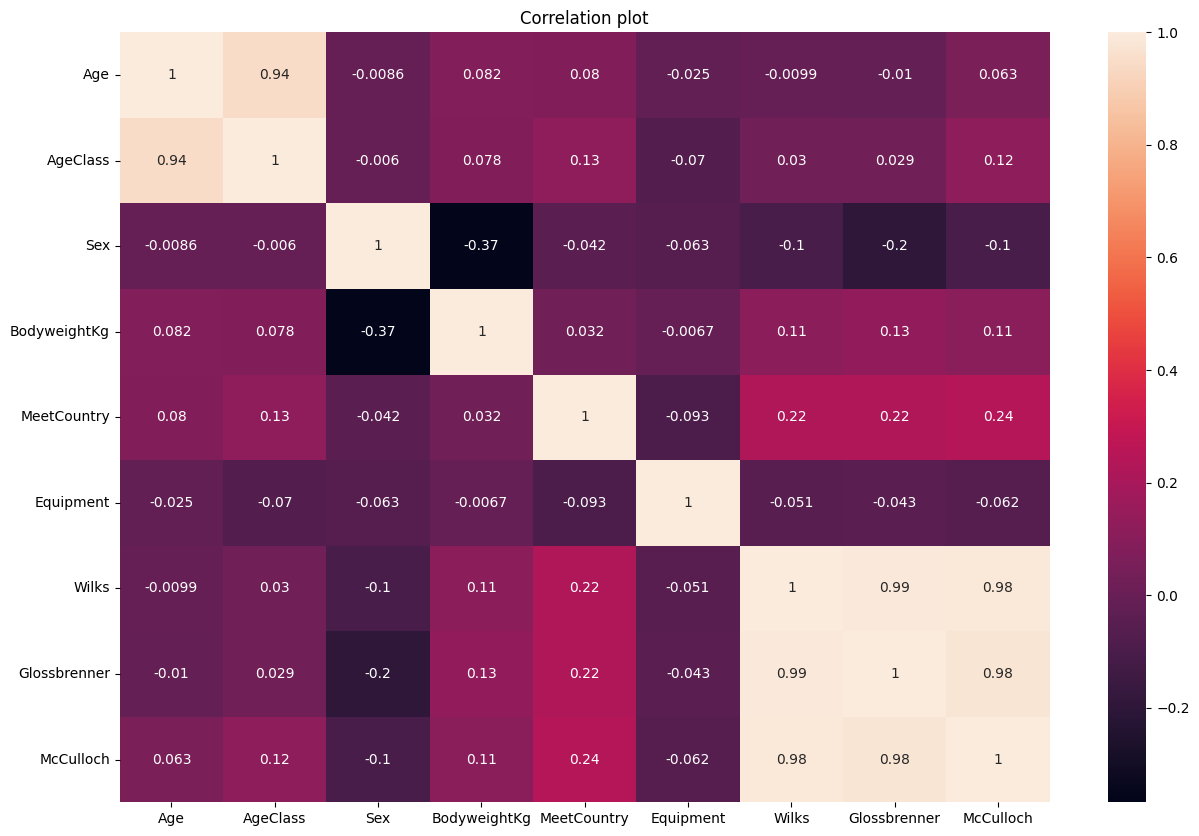

In [29]:
plt.figure(figsize=(15,10));plt.subplot(title = 'Correlation plot')
sns.heatmap(df.corr(),annot=True)

In [14]:
X = df.drop(columns=['Place'],axis=1) # Feature Space
Y = df.Place # Target value

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

In [19]:
auto_model = TPOTClassifier(
        generations=10, # number of times to run
        population_size=100, # number of models each run
        offspring_size=None,
        mutation_rate=0.9, # typical mutation rate
        crossover_rate=0.1, # mutation + crossover = 1
        scoring=None,
        cv=5,
        subsample=1.0,
        n_jobs=1,
        max_time_mins=None,
        max_eval_time_mins=5,
        random_state=None,
        config_dict=None,
        template=None,
        warm_start=False,
        memory=None,
        use_dask=False,
        periodic_checkpoint_folder=None,
        early_stop=None,
        verbosity=2,
        disable_update_check=False,
        )

COMMENT THIS OUT FOR SPEED TESTING LOGISTIC REGRESSION

In [20]:
auto_model.fit(X,Y)

In [21]:
auto_model.export("tree_pipeline.py")

Linear Regression training

In [22]:
regression = LogisticRegression(random_state=0)

regression.fit(X_train,Y_train)

acc = regression.score(X_test,Y_test)

print("Acc = ", acc)

Acc =  0.6926451864511763


Now Last Model prediciton. Using Neural Networks. Using Tensorboard for visualization and help with model!

In [15]:
import tensorflow as tf
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Get data Ready

In [16]:
Y_testNN = tf.keras.utils.to_categorical(Y_test,4)
Y_trainNN = tf.keras.utils.to_categorical(Y_train,4)

Create Model

In [17]:
model = Sequential(
    [
        Dense(128,activation="sigmoid"),
        Dense(64,activation="sigmoid"),
        Dense(4,activation="sigmoid")
    ]
)

Compile Model

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


Train Model

In [19]:
model.fit(
    X_train,
    Y_trainNN,
    epochs=100,
    )

Epoch 1/100
21796/21796 [==============================] - 29s 1ms/step - loss: 0.6280 - accuracy: 0.7294
Epoch 2/100
21796/21796 [==============================] - 28s 1ms/step - loss: 0.6141 - accuracy: 0.7403
Epoch 3/100
21796/21796 [==============================] - 28s 1ms/step - loss: 0.6075 - accuracy: 0.7450
Epoch 4/100
21796/21796 [==============================] - 29s 1ms/step - loss: 0.6046 - accuracy: 0.7457
Epoch 5/100
21796/21796 [==============================] - 30s 1ms/step - loss: 0.6031 - accuracy: 0.7467
Epoch 6/100
21796/21796 [==============================] - 28s 1ms/step - loss: 0.6026 - accuracy: 0.7469
Epoch 7/100
21796/21796 [==============================] - 29s 1ms/step - loss: 0.6020 - accuracy: 0.7474
Epoch 8/100
21796/21796 [==============================] - 29s 1ms/step - loss: 0.6011 - accuracy: 0.7481
Epoch 9/100
21796/21796 [==============================] - 29s 1ms/step - loss: 0.6000 - accuracy: 0.7483
Epoch 10/100
21796/21796 [====================

Evaluate Model

In [28]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 26392), started 5:42:39 ago. (Use '!kill 26392' to kill it.)

In [20]:
model.evaluate(X_test,Y_testNN)

5449/5449 [==============================] - 6s 1ms/step - loss: 0.6150 - accuracy: 0.7309


[0.6149734258651733, 0.730944812297821]

In [1]:
joblib.dump(model,'nn_model.joblib')

NameError: name 'joblib' is not defined